# 미분

- 변수의 움직임에 따른 함수값의 변화를 측정하기 위한 도구


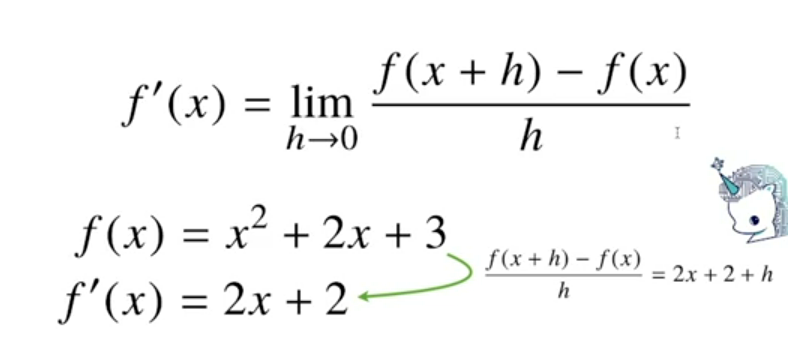

In [ ]:
import sympy as sym
from sympy.abc import x

sym.diff(sym.poly(x**2 + 2*x + 3),x)    # sympy.diff로 미분 계산 가능

Poly(2*x + 2, x, domain='ZZ')

미분
- 함수 f의 주어진 점 (x,f(x))에서의 접선의 기울기
- 한 점에서 접선의 기울기를 통해 방향에 따른 함수값의 증감을 확인 할 수 있음

- 미분값을 더하면 경사상승 : 함수의 극댓값의 위치
- 미분값을 빼면 경사하강 : 함수의 극솟값의 위치

- 경사상승/하강 방법은 극값에 도달하면 움직임이 멈춤

In [ ]:
# 경사하강법의 알고리즘

# input : gradient, init, lr, eps
# output : var

var = init
grad = gradient(var)
while(abs(grad) > eps) :      # 컴퓨터의 미분은 정확히 0이 되지 않기 때문에 매우 작은 값인 eps보다 작을 때 종료하는 조건이 필요
  var = var - lr *grad        # x-Lf'(X)를 계산
  grad = gradient(var)



In [ ]:
import numpy as np
def func(val) :
  fun = sym.poly(x**2 + 2*x + 3)
  return fun.subs(x,val), fun

def func_gradient(fun,val) :
  _, function = func(val)
  diff = sym.diff(function, x)
  return diff.subs(x,val), diff

def gradient_descent(fun, init_point, lr_rate = 1e-2, epsilon=1e-5) :
  cnt = 0
  val = init_point
  diff, _ = func_gradient(fun, init_point)
  while np.abs(diff) > epsilon :
    val = val - lr_rate * diff
    diff, _ = func_gradient(fun, val)
    cnt +=1

  print('함수 : {}, 연산횟수 : {}, 최솟점 : ({}, {})'.format(fun(val)[1], cnt, val, fun(val)[0]))

gradient_descent(fun=func, init_point = np.random.uniform(-2,2))

함수 : Poly(x**2 + 2*x + 3, x, domain='ZZ'), 연산횟수 : 648, 최솟점 : (-0.999995071151744, 2.00000000002429)


##변수가 벡터일 경우

- 벡터가 입력인 다변수 함수의 경우 편미분을 사용

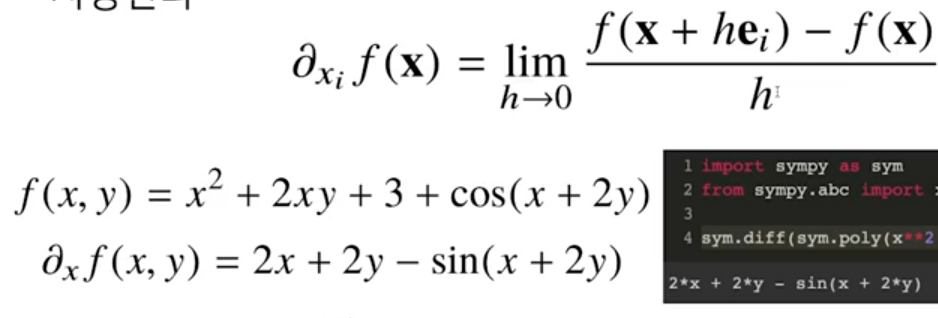

ei는 i번째 값만 1이고 나머지는 0인 단위벡터

In [ ]:
import sympy as sym
from sympy.abc import x,y

sym.diff(sym.poly(x**2 + x*2*y + 3) + sym.cos(x + 2*y),x)     #x에 대한 편미분 결과를 반환


<ipython-input-6-03e6b2c2f084>:4: SymPyDeprecationWarning: 

Mixing Poly with non-polynomial expressions in binary
operations is deprecated. Either explicitly convert
the non-Poly operand to a Poly with as_poly() or
convert the Poly to an Expr with as_expr().

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-poly-nonpoly-binary-operations
for details.

This has been deprecated since SymPy version 1.6. It
will be removed in a future version of SymPy.

  sym.diff(sym.poly(x**2 + x*2*y + 3) + sym.cos(x + 2*y),x)


2*x + 2*y - sin(x + 2*y)

- 각 변수 별로 편미분을 계산한 gradient 벡터를 이용하여 경사하강/경사상승법에 사용할 수 있다

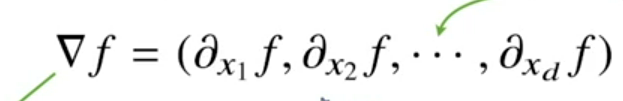

nabla : 주어진 다변수를 입력으로 받는 함수의 그레디언트 벡터를 표시

- f'(X)대신 nabla를 사용하여 변수 x를 업데이트 가능

그레디언트 벡터 n(x,y)는 각 점 (x,y)에서 가장 빨리 혹은 감소하는 방향을 나타냄